# PCA

Principle component analysis on images to be used in preprocessing according to the techniques presented in AlexNet.

In [16]:
image_path = "C:/Users/hanna/Desktop/git/interiorcardamage/Data/Data generation V5/KnitCap/000241.png"

### Image decomprossion with PCA

https://towardsdatascience.com/image-compression-with-pca-a0595f57940c

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_raw = imread( image_path )
print(image_raw.shape)

(1080, 1920, 4)


Strangely, this shows that my images has four channels. After checking in photoshop, the image is indeed in RGB format, which means the fourth channel is probably the opacity of the pixel. 

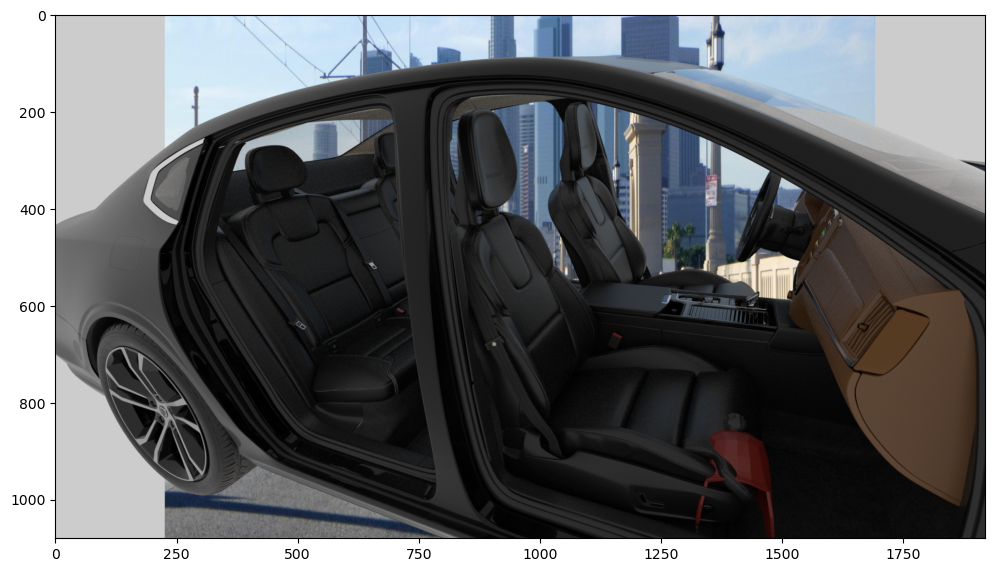

In [18]:
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

In [19]:
# Show the new shape of the image
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

# Show the max value at any point.  1.0 = Black, 0.0 = White
image_bw = image_sum/image_sum.max()
print(image_bw.max())

(1080, 1920)
1.0


Play around with ```percentage_var``` below. This changes where the lines are drawn on the outputted graph, showing how many PCs explain ```percentage_var``` percentage of the variance.

What's interesting is that you can get very close to the flat line at around 200 PCs which is considerably less than the total number of components in the image (1080).

Number of components explaining 99.85% variance: 297


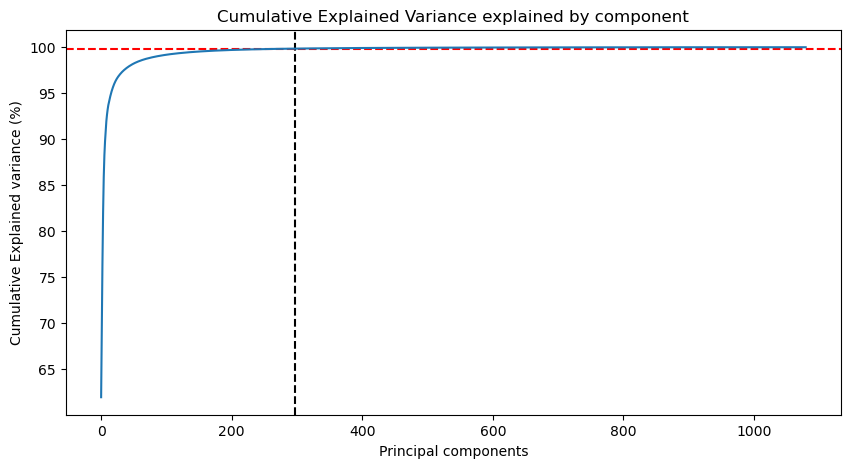

In [24]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

percentage_var = 99.85 # original article had 95

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>percentage_var)
print(f"Number of components explaining {percentage_var}% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by component')
plt.ylabel('Cumulative Explained variance (%)')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=percentage_var, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [5]:
len(pca.components_)

1080

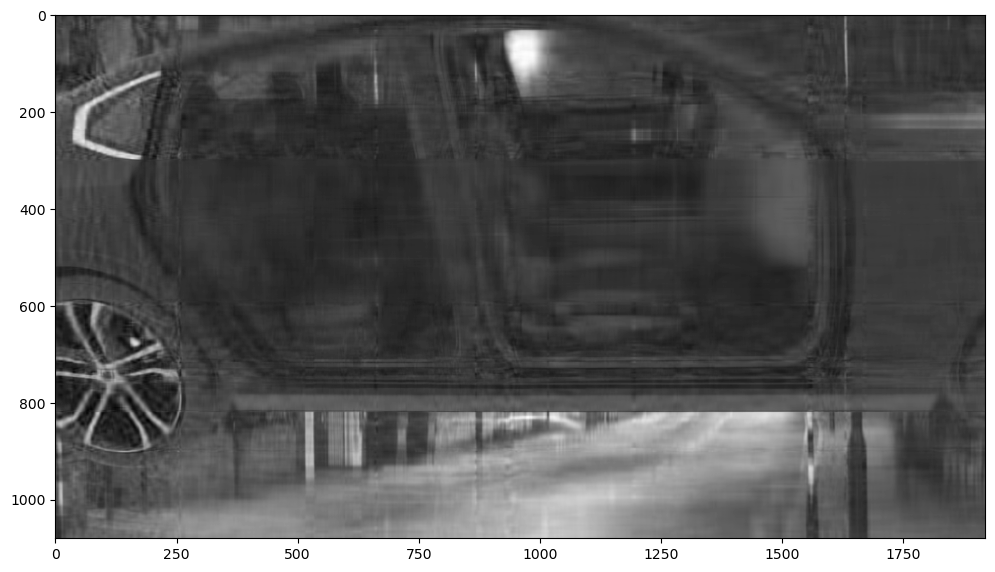

In [6]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

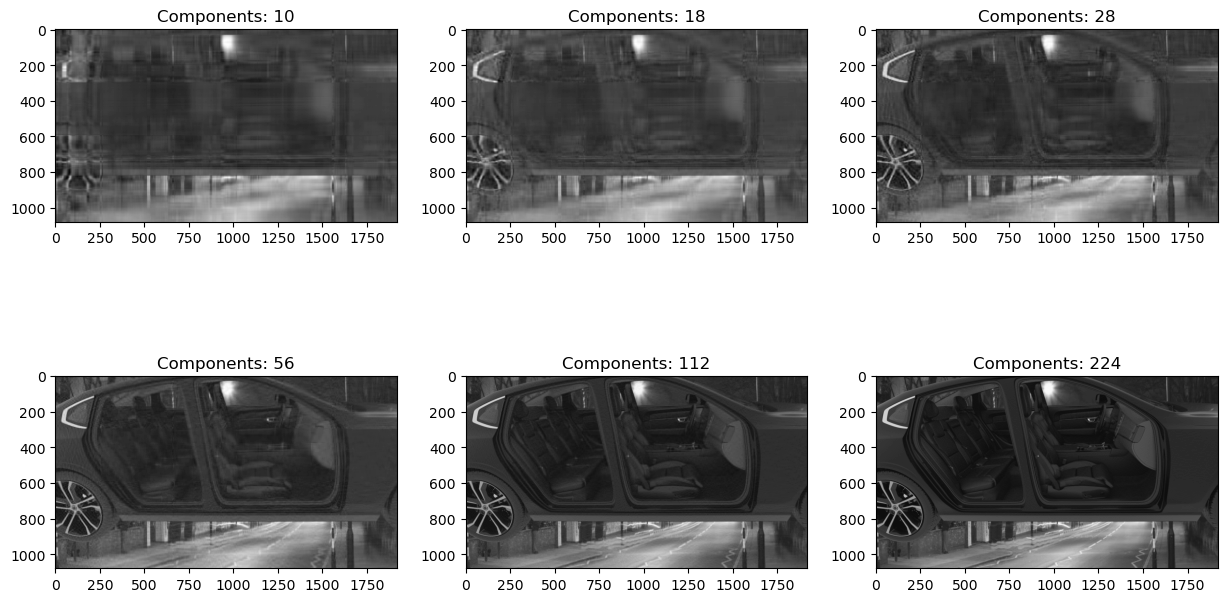

In [7]:
def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)

ks = [10, 18, 28, 56, 112, 224]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()

### Finding eigenvalues and vectors using PCA

https://www.youtube.com/watch?v=SBYdqlLgbGk
https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca

In [24]:
pca = PCA(n_components=2)
pca.fit( image_bw )

pca.explained_variance_ratio_ # eignenvalues here
pca.components_ # eigenvectors here (principle components) length = n_components


### PCA on full colour image

In [2]:
# Importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

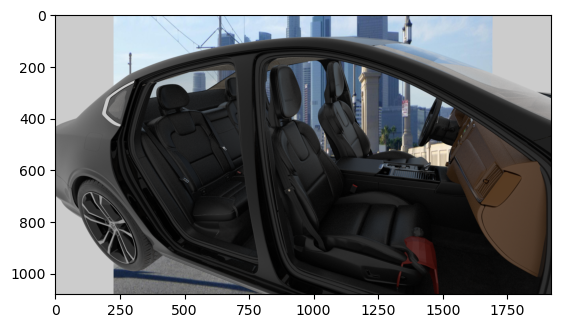

In [4]:
# Loading the image 
img = cv2.imread( image_path, cv2.IMREAD_UNCHANGED ) #you can use any image you want.
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()


In [14]:

# Splitting the image in R,G,B arrays.
blue,green,red, a = cv2.split(img) 
cv2.imwrite('red_channel.jpg', red)

True

Based on previous findings, only need the first 300 components.

In [25]:
#initialize PCA with first 300 principal components
pca = PCA(300)
 
#Applying to red channel and then applying inverse transform to transformed array.
red_transformed = pca.fit_transform(red)
red_inverted = pca.inverse_transform(red_transformed)
 
#Applying to Green channel and then applying inverse transform to transformed array.
green_transformed = pca.fit_transform(green)
green_inverted = pca.inverse_transform(green_transformed)
 
#Applying to Blue channel and then applying inverse transform to transformed array.
blue_transformed = pca.fit_transform(blue)
blue_inverted = pca.inverse_transform(blue_transformed)

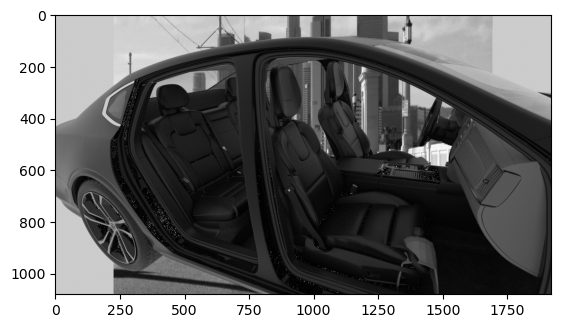

In [26]:
img_compressed = (np.dstack((red_inverted, red_inverted, red_inverted))).astype(np.uint8)
plt.imshow(img_compressed)

### Final pipeline

1. Split image into red, green and blue using cv2.
2. PCA of each colour channel.
3. Add to each image a random multiple of found principle components.
4. Combine image back together again.



In [27]:
# Importing required libraries
import cv2
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(300)
img = cv2.imread( image_path, cv2.IMREAD_UNCHANGED ) 
blue,green,red, a = cv2.split(img) 

red_transformed = pca.fit(red)
red_evals = pca.explained_variance_ratio_
red_evects = pca.components_

green_transformed = pca.fit(green)
green_evals = pca.explained_variance_ratio_
green_evects = pca.components_

blue_transformed = pca.fit(blue)
blue_evals = pca.explained_variance_ratio_
blue_evects = pca.components_

In [31]:
red_evals

array([5.76634441e-01, 8.56661163e-02, 7.24783347e-02, 5.42080590e-02,
       4.61002506e-02, 2.41453748e-02, 2.11248844e-02, 1.31297401e-02,
       1.19711556e-02, 8.19524785e-03, 5.89684041e-03, 5.26711422e-03,
       4.23058583e-03, 3.87522287e-03, 3.57241008e-03, 3.23011419e-03,
       3.15590718e-03, 2.74624350e-03, 2.27828517e-03, 2.20532120e-03,
       2.04929155e-03, 1.97280929e-03, 1.82019871e-03, 1.64406147e-03,
       1.47224362e-03, 1.40244601e-03, 1.30508869e-03, 1.17706718e-03,
       1.12898329e-03, 1.08155214e-03, 9.85443420e-04, 9.34539614e-04,
       8.91081729e-04, 8.45345076e-04, 8.09728153e-04, 7.63134386e-04,
       7.30943280e-04, 7.24958758e-04, 7.08094695e-04, 6.72237222e-04,
       6.56490062e-04, 6.21597238e-04, 5.87930438e-04, 5.60158082e-04,
       5.41273816e-04, 5.02404257e-04, 4.97290678e-04, 4.83281329e-04,
       4.64189384e-04, 4.45778970e-04, 4.15435214e-04, 4.08404977e-04,
       3.95340152e-04, 3.81755158e-04, 3.62925561e-04, 3.60946825e-04,
      

In [32]:
red_evects

array([[ 0.00684028,  0.00689521,  0.00693395, ...,  0.03197854,
         0.03204019,  0.03209368],
       [-0.02917027, -0.02931612, -0.02944587, ..., -0.00438421,
        -0.00442594, -0.00451763],
       [ 0.00530756,  0.0052807 ,  0.00527145, ...,  0.03804641,
         0.03783473,  0.0375868 ],
       ...,
       [ 0.00970939,  0.00894184,  0.013538  , ..., -0.00392922,
        -0.00265415, -0.02493502],
       [ 0.0085884 ,  0.01119669,  0.00322324, ...,  0.01314733,
         0.00899091,  0.00990946],
       [ 0.00301745,  0.00176684,  0.00241984, ...,  0.02870984,
         0.02118131,  0.01038925]])

In [33]:
green_evals

array([6.20714128e-01, 7.82523110e-02, 6.62299674e-02, 5.56551617e-02,
       3.76552256e-02, 2.41001584e-02, 1.49609011e-02, 1.08943665e-02,
       1.05948108e-02, 7.19559447e-03, 5.79286939e-03, 4.57741498e-03,
       3.41393885e-03, 3.35904474e-03, 2.99804348e-03, 2.78200074e-03,
       2.56165324e-03, 2.41815114e-03, 2.00940045e-03, 1.96715605e-03,
       1.79564533e-03, 1.66379531e-03, 1.43706588e-03, 1.32611378e-03,
       1.23296917e-03, 1.15421236e-03, 1.04506667e-03, 9.79157217e-04,
       9.31537954e-04, 8.73657449e-04, 8.23747064e-04, 8.01561137e-04,
       7.34985099e-04, 7.12830623e-04, 6.80949374e-04, 6.45244468e-04,
       6.15377535e-04, 5.92596338e-04, 5.71933902e-04, 5.57316154e-04,
       5.43987353e-04, 5.03203656e-04, 4.92218728e-04, 4.82590197e-04,
       4.64986595e-04, 4.40904916e-04, 4.33278375e-04, 4.22439818e-04,
       3.93908156e-04, 3.85495924e-04, 3.69307884e-04, 3.49166061e-04,
       3.45966973e-04, 3.31365212e-04, 3.25356724e-04, 3.17770927e-04,
      

In [34]:
green_evects

array([[ 0.00592131,  0.00596859,  0.0060019 , ...,  0.0284079 ,
         0.02847047,  0.02853091],
       [-0.02513395, -0.02526241, -0.02537304, ..., -0.00441626,
        -0.00437013, -0.00440477],
       [ 0.00119223,  0.00119278,  0.00117587, ...,  0.03729273,
         0.0371532 ,  0.03694924],
       ...,
       [ 0.01011692,  0.00862382,  0.01097166, ...,  0.00859436,
         0.00500227, -0.00279824],
       [ 0.00738936,  0.01085556,  0.00952517, ...,  0.0090827 ,
         0.00445403, -0.00594019],
       [-0.0281852 , -0.01383095, -0.00928729, ...,  0.00405724,
         0.02245444,  0.03140749]])

In [35]:
blue_evals

array([6.46128677e-01, 7.62317516e-02, 6.39669520e-02, 5.52176256e-02,
       3.40839616e-02, 2.34339339e-02, 1.13650079e-02, 1.01134711e-02,
       8.92387619e-03, 6.29645370e-03, 5.40353278e-03, 4.12748591e-03,
       3.24117907e-03, 2.93183496e-03, 2.48581001e-03, 2.23248923e-03,
       2.11393518e-03, 1.95823107e-03, 1.78673794e-03, 1.71117250e-03,
       1.54504502e-03, 1.41180509e-03, 1.18413392e-03, 1.12274366e-03,
       1.08847201e-03, 9.93729217e-04, 8.82995297e-04, 8.22337787e-04,
       7.95603565e-04, 7.75815128e-04, 7.39232150e-04, 7.32431859e-04,
       6.78691420e-04, 6.12147264e-04, 5.97731071e-04, 5.79370076e-04,
       5.22915866e-04, 5.12954767e-04, 5.02774000e-04, 4.75406230e-04,
       4.55452584e-04, 4.34846430e-04, 4.24416616e-04, 3.96135086e-04,
       3.89748210e-04, 3.85374931e-04, 3.81162649e-04, 3.75001244e-04,
       3.64298846e-04, 3.52232041e-04, 3.22330102e-04, 3.19447099e-04,
       3.01648616e-04, 2.88013274e-04, 2.83946374e-04, 2.74882729e-04,
      

In [36]:
blue_evects

array([[ 0.00536501,  0.0054078 ,  0.00543785, ...,  0.02581152,
         0.02587482,  0.02593376],
       [ 0.01576432,  0.01585924,  0.01593006, ...,  0.00020413,
         0.00016994,  0.00019328],
       [ 0.00078082,  0.00079794,  0.00078675, ...,  0.03791719,
         0.03783816,  0.03771193],
       ...,
       [-0.01881018, -0.01376042, -0.00061195, ..., -0.01399567,
        -0.00949896,  0.0061293 ],
       [ 0.00273945, -0.00428568, -0.00078653, ..., -0.014274  ,
        -0.0125128 ,  0.00307231],
       [-0.00538679, -0.00757297, -0.00474   , ..., -0.02589858,
         0.00984827,  0.04490507]])